In [1]:
import sys
import os
import glob
import re 
import pandas as pd
import numpy as np
from lxml import etree
import matplotlib.pyplot as plt
import requests
import time
from collections import Counter
import seaborn as sns



In [2]:
results_df = pd.read_csv("./../data/training_results.csv", sep=",", index_col=0)

In [3]:
results_df

,eval/f1_macro,test:test_f1_macro,dataset_century,dataset_config,dataset_language,State,Notes,User,Tags,Created,...,test:test_label_lyric_recall,test:test_label_lyric_support,test:test_label_prophecy_f1-score,test:test_label_prophecy_precision,test:test_label_prophecy_recall,test:test_label_prophecy_support,test:test_label_wisdom_f1-score,test:test_label_wisdom_precision,test:test_label_wisdom_recall,test:test_label_wisdom_support
Name,,,,,,,,,,,,,,,,,,,,,
bert-base-multilingual-cased_sequence_genre_lTUR_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.719147,0.727717,NaN,genre,TUR,finished,-,versae,NaN,2021-11-09T17:08:33.000Z,...,0.695364,151.0,0.617544,0.656716,0.582781,151.0,0.720539,0.732877,0.708609,151.0
bert-base-multilingual-cased_sequence_division_lall_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.880198,0.879216,NaN,division,all,finished,-,versae,NaN,2021-11-08T11:18:15.000Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bert-base-multilingual-cased_sequence_genre_lall_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.937800,0.938947,NaN,genre,all,finished,-,versae,NaN,2021-11-08T11:16:08.000Z,...,0.933175,20187.0,0.927843,0.929249,0.926441,20188.0,0.932982,0.928905,0.937094,20189.0
bert-base-multilingual-cased_sequence_testament_lall_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.945950,0.944422,NaN,testament,all,finished,-,versae,NaN,2021-11-08T11:15:59.000Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bert-base-multilingual-cased_sequence_division_lXKL_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.576378,0.611678,NaN,division,XKL,finished,-,versae,NaN,2021-11-08T10:46:01.000Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bert-base-multilingual-cased_sequence_testament_lBUL_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.953709,0.954057,NaN,testament,BUL,finished,-,versae,NaN,2021-11-07T23:49:02.000Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bert-base-multilingual-cased_sequence_testament_lBEL_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.906832,0.902069,NaN,testament,BEL,finished,-,versae,NaN,2021-11-07T23:46:36.000Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bert-base-multilingual-cased_sequence_testament_lAZB_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.912981,0.915782,NaN,testament,AZB,finished,-,versae,NaN,2021-11-07T23:46:30.000Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Add Language Metadata

In [4]:
languages_df = pd.read_csv("./../data/data_controlled/languages_controlled-tsv.tsv", sep="\t", index_col=0)

In [5]:
languages_df["language-code"] = languages_df.index

In [6]:
languages_df.rename(columns={"Language-name": "language"}, inplace = True)

In [7]:
languages_df.head(5)

,Original-Language-name,used_in_ml_bert?,wikipedia_abbreviation,wikipedia_nr_articles_2021,language,subclass of,main family of languages,family of languages,macro family of languages,main writing system,...,has grammatical person,has grammatical gender,has grammatical mood,q-values,wiki-id,Country,Continent,Type of languages,Alfabet,language-code
language-code,,,,,,,,,,,,,,,,,,,,,
ALB,Albanian,1,NaN,84162,Albanian,Indo-European,Indo-European,other Indo-European languages,Albanian-Slavic-Romance-Germanic,Latin script,...,NaN,NaN,mirative,Q8748,NaN,NaN,Europe,natural,?,ALB
ARA,Arabic,1,NaN,1140422,Arabic,Semitic,Semitic,Semitic,Semitic,Arabic alphabet,...,first-person singular|first-person plural|thir...,masculine|feminine|neuter|common gender,NaN,Q13955,NaN,NaN,Asia,natural,latin,ARA
AZB,Azerbaijani,1,NaN,179494,Azerbaijani,Western Oghuz,Turkic,Turkic,Turkic,Arabic alphabet,...,NaN,NaN,NaN,Q9292,NaN,NaN,Asia,natural,?,AZB
BAQ,Basque,1,NaN,38148,Basque,Vasconic languages|Southern European languages,Language isolate,Language isolate,Language isolate,Latin script,...,NaN,NaN,NaN,Q8752,NaN,NaN,Europe,natural,latin,BAQ
BEL,Belarusian,1,NaN,209937,Belarusian,East Slavic,Balto-Slavic,Balto-Slavic,Albanian-Slavic-Romance-Germanic,Cyrillic alphabet,...,NaN,masculine|feminine|neuter,indicative|conditional|imperative,Q9091,NaN,NaN,Europe,natural,cyrillic,BEL


In [8]:
languages_df[["language-code", "language", "family of languages", "macro family of languages", "main writing system", "q-values", "Continent", "used_in_ml_bert?",	"wikipedia_nr_articles_2021"]].head()

,language-code,language,family of languages,macro family of languages,main writing system,q-values,Continent,used_in_ml_bert?,wikipedia_nr_articles_2021
language-code,,,,,,,,,
ALB,ALB,Albanian,other Indo-European languages,Albanian-Slavic-Romance-Germanic,Latin script,Q8748,Europe,1,84162
ARA,ARA,Arabic,Semitic,Semitic,Arabic alphabet,Q13955,Asia,1,1140422
AZB,AZB,Azerbaijani,Turkic,Turkic,Arabic alphabet,Q9292,Asia,1,179494
BAQ,BAQ,Basque,Language isolate,Language isolate,Latin script,Q8752,Europe,1,38148
BEL,BEL,Belarusian,Balto-Slavic,Albanian-Slavic-Romance-Germanic,Cyrillic alphabet,Q9091,Europe,1,209937


In [9]:
results_df = pd.merge(results_df, languages_df[["language", "family of languages", "macro family of languages", "main writing system", "q-values", "Continent",  "used_in_ml_bert?",	"wikipedia_nr_articles_2021"]], left_on=  "dataset_language", right_index=True)



In [10]:
results_df.head()

,eval/f1_macro,test:test_f1_macro,dataset_century,dataset_config,dataset_language,State,Notes,User,Tags,Created,...,test:test_label_wisdom_recall,test:test_label_wisdom_support,language,family of languages,macro family of languages,main writing system,q-values,Continent,used_in_ml_bert?,wikipedia_nr_articles_2021
Name,,,,,,,,,,,,,,,,,,,,,
bert-base-multilingual-cased_sequence_genre_lTUR_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.719147,0.727717,NaN,genre,TUR,finished,-,versae,NaN,2021-11-09T17:08:33.000Z,...,0.708609,151.0,Turkish,Turkic,Turkic,Latin script,Q256,Asia,1,431808
bert-base-multilingual-cased_sequence_division_lTUR_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.711125,0.712165,NaN,division,TUR,finished,-,versae,NaN,2021-11-08T10:41:48.000Z,...,NaN,NaN,Turkish,Turkic,Turkic,Latin script,Q256,Asia,1,431808
bert-base-multilingual-cased_sequence_testament_lTUR_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.930773,0.934461,NaN,testament,TUR,finished,-,versae,NaN,2021-11-08T03:02:27.000Z,...,NaN,NaN,Turkish,Turkic,Turkic,Latin script,Q256,Asia,1,431808
bert-base-multilingual-cased_sequence_division_lXKL_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.576378,0.611678,NaN,division,XKL,finished,-,versae,NaN,2021-11-08T10:46:01.000Z,...,NaN,NaN,Klingoln,constructed language,constructed language,Latin script,NaN,artificial,0,0
bert-base-multilingual-cased_sequence_genre_lXKL_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.646212,0.676952,NaN,genre,XKL,finished,-,versae,NaN,2021-11-08T08:48:48.000Z,...,0.709677,155.0,Klingoln,constructed language,constructed language,Latin script,NaN,artificial,0,0


In [11]:
#results_df.rename(columns={"dataset_language" : "language"}, inplace=True)

In [12]:
results_df

,eval/f1_macro,test:test_f1_macro,dataset_century,dataset_config,dataset_language,State,Notes,User,Tags,Created,...,test:test_label_wisdom_recall,test:test_label_wisdom_support,language,family of languages,macro family of languages,main writing system,q-values,Continent,used_in_ml_bert?,wikipedia_nr_articles_2021
Name,,,,,,,,,,,,,,,,,,,,,
bert-base-multilingual-cased_sequence_genre_lTUR_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.719147,0.727717,NaN,genre,TUR,finished,-,versae,NaN,2021-11-09T17:08:33.000Z,...,0.708609,151.0,Turkish,Turkic,Turkic,Latin script,Q256,Asia,1,431808
bert-base-multilingual-cased_sequence_division_lTUR_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.711125,0.712165,NaN,division,TUR,finished,-,versae,NaN,2021-11-08T10:41:48.000Z,...,NaN,NaN,Turkish,Turkic,Turkic,Latin script,Q256,Asia,1,431808
bert-base-multilingual-cased_sequence_testament_lTUR_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.930773,0.934461,NaN,testament,TUR,finished,-,versae,NaN,2021-11-08T03:02:27.000Z,...,NaN,NaN,Turkish,Turkic,Turkic,Latin script,Q256,Asia,1,431808
bert-base-multilingual-cased_sequence_division_lXKL_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.576378,0.611678,NaN,division,XKL,finished,-,versae,NaN,2021-11-08T10:46:01.000Z,...,NaN,NaN,Klingoln,constructed language,constructed language,Latin script,NaN,artificial,0,0
bert-base-multilingual-cased_sequence_genre_lXKL_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.646212,0.676952,NaN,genre,XKL,finished,-,versae,NaN,2021-11-08T08:48:48.000Z,...,0.709677,155.0,Klingoln,constructed language,constructed language,Latin script,NaN,artificial,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bert-base-multilingual-cased_sequence_genre_lARA_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.630421,0.627669,NaN,genre,ARA,finished,-,versae,NaN,2021-11-08T03:26:36.000Z,...,0.647249,309.0,Arabic,Semitic,Semitic,Arabic alphabet,Q13955,Asia,1,1140422
bert-base-multilingual-cased_sequence_testament_lARA_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.892326,0.895786,NaN,testament,ARA,finished,-,versae,NaN,2021-11-07T23:45:52.000Z,...,NaN,NaN,Arabic,Semitic,Semitic,Arabic alphabet,Q13955,Asia,1,1140422
bert-base-multilingual-cased_sequence_division_lALB_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.713753,0.692851,NaN,division,ALB,finished,-,versae,NaN,2021-11-08T08:57:00.000Z,...,NaN,NaN,Albanian,other Indo-European languages,Albanian-Slavic-Romance-Germanic,Latin script,Q8748,Europe,1,84162


In [13]:
results_df.language.unique()

array(['Turkish', 'Klingoln', 'Vietnamese', 'Thai', 'Tagalog', 'Tamil',
       'Swedish', 'Spanish', 'Croatian', 'Russian', 'Romanian',
       'Portuguese', 'Norwegian', 'Swiss High German', 'Marathi', 'Latin',
       'Korean', 'Italian', 'Hungarian', 'Hindi', 'Hebrew',
       'Haitian Creole', 'Greek', 'German', 'French', 'Finnish',
       'Esperanto', 'English', 'Danish', 'Czech', 'Chinese', 'Cebuano',
       'Bulgarian', 'Belarusian', 'Azerbaijani', 'Arabic', 'Albanian'],
      dtype=object)

In [14]:
results_df.loc[results_df["language"] == "English", "is_English?"] = True
results_df["is_English?"].fillna(False, inplace=True)

In [15]:
results_df.loc[results_df["family of languages"].isin(["Romance", "Germanic"]), "is_Romance_or_Germanic?"] = True

results_df["is_Romance_or_Germanic?"].fillna(False, inplace=True)

In [16]:
results_df["main writing system"]

Name
bert-base-multilingual-cased_sequence_genre_lTUR_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0           Latin script
bert-base-multilingual-cased_sequence_division_lTUR_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0        Latin script
bert-base-multilingual-cased_sequence_testament_lTUR_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0       Latin script
bert-base-multilingual-cased_sequence_division_lXKL_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0        Latin script
bert-base-multilingual-cased_sequence_genre_lXKL_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0           Latin script
                                                                                                 ...       
bert-base-multilingual-cased_sequence_genre_lARA_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0        Arabic alphabet
bert-base-multilingual-cased_sequence_testament_lARA_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0    Arabic alphabet
bert-base-multilingual-cased_sequence_division_lALB_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0        Latin script
bert-base-multilingual-

In [17]:
results_df.loc[results_df["main writing system"] == "Latin script", "in_Latin_script?"] = True
results_df["in_Latin_script?"].fillna(False, inplace=True)

In [18]:
#metadata["bert_multilingual_cased_count_parts_tokens_median/characters_count_median"] = metadata["bert_multilingual_cased_count_parts_tokens_median"] / metadata["characters_count_median"]

In [19]:
#metadata["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"] = metadata["bert_multilingual_cased_count_parts_tokens_median"] / metadata["text_count_tokens_median"]

In [20]:
#metadata

# Export Data

In [21]:
results_df.to_csv("./../data/training_results_languages_metadat.tsv", sep="\t")

# Explore

In [35]:
results_df = pd.read_csv("./../data/training_results_languages_metadat.tsv", sep="\t", index_col=0)

In [37]:
results_df

,eval/f1_macro,test:test_f1_macro,dataset_century,dataset_config,dataset_language,State,Notes,User,Tags,Created,...,family of languages,macro family of languages,main writing system,q-values,Continent,used_in_ml_bert?,wikipedia_nr_articles_2021,is_English?,is_Romance_or_Germanic?,in_Latin_script?
Name,,,,,,,,,,,,,,,,,,,,,
bert-base-multilingual-cased_sequence_genre_lTUR_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.719147,0.727717,NaN,genre,TUR,finished,-,versae,NaN,2021-11-09T17:08:33.000Z,...,Turkic,Turkic,Latin script,Q256,Asia,1,431808,False,False,True
bert-base-multilingual-cased_sequence_division_lTUR_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.711125,0.712165,NaN,division,TUR,finished,-,versae,NaN,2021-11-08T10:41:48.000Z,...,Turkic,Turkic,Latin script,Q256,Asia,1,431808,False,False,True
bert-base-multilingual-cased_sequence_testament_lTUR_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.930773,0.934461,NaN,testament,TUR,finished,-,versae,NaN,2021-11-08T03:02:27.000Z,...,Turkic,Turkic,Latin script,Q256,Asia,1,431808,False,False,True
bert-base-multilingual-cased_sequence_division_lXKL_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.576378,0.611678,NaN,division,XKL,finished,-,versae,NaN,2021-11-08T10:46:01.000Z,...,constructed language,constructed language,Latin script,NaN,artificial,0,0,False,False,True
bert-base-multilingual-cased_sequence_genre_lXKL_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.646212,0.676952,NaN,genre,XKL,finished,-,versae,NaN,2021-11-08T08:48:48.000Z,...,constructed language,constructed language,Latin script,NaN,artificial,0,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bert-base-multilingual-cased_sequence_genre_lARA_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.630421,0.627669,NaN,genre,ARA,finished,-,versae,NaN,2021-11-08T03:26:36.000Z,...,Semitic,Semitic,Arabic alphabet,Q13955,Asia,1,1140422,False,False,False
bert-base-multilingual-cased_sequence_testament_lARA_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.892326,0.895786,NaN,testament,ARA,finished,-,versae,NaN,2021-11-07T23:45:52.000Z,...,Semitic,Semitic,Arabic alphabet,Q13955,Asia,1,1140422,False,False,False
bert-base-multilingual-cased_sequence_division_lALB_e3.0_lr3e-05_ws0.1_wd0.0_s2021_eas0,0.713753,0.692851,NaN,division,ALB,finished,-,versae,NaN,2021-11-08T08:57:00.000Z,...,Indo-European,Albanian-Slavic-Romance-Germanic,Latin script,Q8748,Europe,1,84162,False,False,True


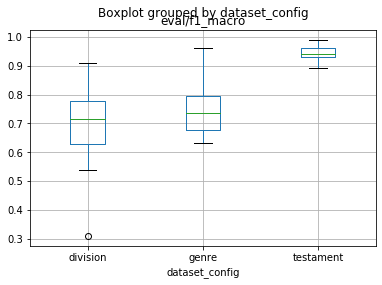

In [39]:
results_df.boxplot("eval/f1_macro", by="dataset_config")